<a href="https://colab.research.google.com/github/estebanhernandezr/AWEN/blob/main/Vowels_Classifier_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imports and GitHub**

In [7]:
!git clone https://github.com/AllenDowney/ThinkDSP.git 

fatal: destination path 'ThinkDSP' already exists and is not an empty directory.


In [8]:
!git clone https://github.com/Tyler-Hilbert/AudioProcessingInPythonWorkshop.git

fatal: destination path 'AudioProcessingInPythonWorkshop' already exists and is not an empty directory.


In [9]:
import numpy as np
import os
from google.colab import drive
sys.path.insert(0, 'ThinkDSP/code/')
import sys
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

#**Importación de los datos**

Para empezar, debemos cargar la base de datos desde *google drive*. Para esto, utilizamos el modulo **drive**. Una vez realizada la interfaz desde *colab*, navegamos entre las carpetas hasta la ruta: ***content/drive/My Drive/Proyecto Clasificación de Vocales)***.

In [10]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


A continuación, accedemos al contenido de la ruta. Nos percatamos de que en ella existen tres carpetas: **A**, **E**, **I**, **O** Y **U**, cada una de las cuales contiene una colección de notas de voz de *Whatsapp* (archivos **.ogg**). Estos archivos corresponden a una muestra aleatoria tomada por los estudiantes del curso de *Aprendizaje Automático de Máquina*, compuesta en su mayoría por voces de jovenes adultos (compañeros de **MACC**).

In [11]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales"

A  E  I  O  U


Accediendo al contenido de la carpeta **A**

In [12]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/A"

 A_001.wav   A_035.wav	 A_069.wav
 A_002.wav   A_036.wav	 A_070.wav
 A_003.wav   A_037.wav	 A_071.wav
 A_004.wav   A_038.wav	 A_075.wav
 A_005.wav   A_039.wav	 A_076.wav
 A_006.wav   A_040.wav	 A_077.wav
 A_007.wav   A_041.wav	 A_078.wav
 A_008.wav   A_042.wav	 A_080.wav
 A_009.wav   A_043.wav	 A_082.wav
 A_010.wav   A_044.wav	 A_083.wav
 A_011.wav   A_045.wav	 A_084.wav
 A_012.wav   A_046.wav	 A_085.wav
 A_013.wav   A_047.wav	 A_086.wav
 A_014.wav   A_048.wav	 A_088.wav
 A_015.wav   A_049.wav	 A_100.wav
 A_016.wav   A_050.wav	 A_94.wav
 A_017.wav   A_051.wav	 A_98.wav
 A_018.wav   A_052.wav	 A_99.wav
 A_019.wav   A_053.wav	'WhatsApp Audio 2022-03-20 at 5.19.25 PM.ogg'
 A_020.wav   A_054.wav	'WhatsApp Audio 2022-03-20 at 5.45.21 PM.ogg'
 A_021.wav   A_055.wav	'WhatsApp Audio 2022-03-20 at 6.12.05 PM.ogg'
 A_022.wav   A_056.wav	'WhatsApp Ptt 2022-03-18 at 11.54.54 PM.ogg'
 A_023.wav   A_057.wav	'WhatsApp Ptt 2022-03-18 at 4.49.41 PM.ogg'
 A_024.wav   A_058.wav	'WhatsApp Ptt 2022-03-19 a

In [13]:
path_A = '/content/drive/My Drive/Proyecto Clasificación de Vocales/A'
dir_path_A = os.path.dirname(os.path.realpath(path_A))
A_records = []
for root, dirs, files in os.walk(dir_path_A):
    for record in files:
        if record.startswith('A'):
            A_records.append(record)

Accediendo al contenido de la carpeta **E**

In [14]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/E"

 E_001.wav   E_035.wav	 E_068.wav
 E_002.wav   E_036.wav	 E_069.wav
 E_004.wav   E_037.wav	 E_070.wav
 E_005.wav   E_038.wav	 E_071.wav
 E_006.wav   E_039.wav	 E_075.wav
 E_007.wav   E_040.wav	 E_076.wav
 E_008.wav   E_041.wav	 E_077.wav
 E_009.wav   E_042.wav	 E_080.wav
 E_010.wav   E_043.wav	 E_100.wav
 E_011.wav   E_044.wav	 E_82.wav
 E_012.wav   E_045.wav	 E_83.wav
 E_013.wav   E_046.wav	 E_84.wav
 E_014.wav   E_047.wav	 E_85.wav
 E_015.wav   E_048.wav	 E_86.wav
 E_016.wav   E_049.wav	 E_87.wav
 E_017.wav   E_050.wav	 E_99.wav
 E_018.wav   E_051.wav	'WhatsApp Audio 2022-03-20 at 5.19.25 PM.ogg'
 E_019.wav   E_052.wav	'WhatsApp Audio 2022-03-20 at 5.45.25 PM.ogg'
 E_020.wav   E_053.wav	'WhatsApp Audio 2022-03-20 at 6.12.05 PM (1).ogg'
 E_021.wav   E_054.wav	'WhatsApp Ptt 2022-03-18 at 11.55.12 PM.ogg'
 E_022.wav   E_055.wav	'WhatsApp Ptt 2022-03-18 at 4.21.47 PM.ogg'
 E_023.wav   E_056.wav	'WhatsApp Ptt 2022-03-18 at 4.49.54 PM.ogg'
 E_024.wav   E_057.wav	'WhatsApp Ptt 2022-03-19 at

In [15]:
path_E = '/content/drive/My Drive/Proyecto Clasificación de Vocales/E'
dir_path_E = os.path.dirname(os.path.realpath(path_E))
E_records = []
for root, dirs, files in os.walk(dir_path_E):
    for record in files:
        if record.startswith('E'):
            E_records.append(record)

Accediendo al contenido de la carpeta **I**

In [16]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/I"

 I_001.wav   I_034.wav	 I_068.wav
 I_002.wav   I_035.wav	 I_069.wav
 I_003.wav   I_036.wav	 I_070.wav
 I_004.wav   I_037.wav	 I_071.wav
 I_005.wav   I_038.wav	 I_100.wav
 I_006.wav   I_039.wav	 I_75.wav
 I_007.wav   I_040.wav	 I_76.wav
 I_008.wav   I_041.wav	 I_77.wav
 I_009.wav   I_042.wav	 I_80.wav
 I_010.wav   I_043.wav	 I_82.wav
 I_011.wav   I_044.wav	 I_83.wav
 I_012.wav   I_045.wav	 I_84.wav
 I_013.wav   I_046.wav	 I_85.wav
 I_014.wav   I_047.wav	 I_86.wav
 I_015.wav   I_048.wav	 I_87.wav
 I_016.wav   I_050.wav	 I_99.wav
 I_017.wav   I_051.wav	'WhatsApp Audio 2022-03-20 at 5.19.25 PM.ogg'
 I_018.wav   I_052.wav	'WhatsApp Audio 2022-03-20 at 5.45.27 PM.ogg'
 I_019.wav   I_053.wav	'WhatsApp Audio 2022-03-20 at 6.12.05 PM.ogg'
 I_020.wav   I_054.wav	'WhatsApp Ptt 2022-03-18 at 11.58.11 PM.ogg'
 I_021.wav   I_055.wav	'WhatsApp Ptt 2022-03-18 at 4.21.55 PM.ogg'
 I_022.wav   I_056.wav	'WhatsApp Ptt 2022-03-18 at 4.49.54 PM (1).ogg'
 I_023.wav   I_057.wav	'WhatsApp Ptt 2022-03-19 at 2.1

In [17]:
path_I = '/content/drive/My Drive/Proyecto Clasificación de Vocales/I'
dir_path_I = os.path.dirname(os.path.realpath(path_I))
I_records = []
for root, dirs, files in os.walk(dir_path_I):
    for record in files:
        if record.startswith('I'):
            I_records.append(record)

Accediendo al contenido de la carpeta **O**

In [18]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/O"

 O_001.wav   O_035.wav	 O_068.wav
 O_002.wav   O_036.wav	 O_069.wav
 O_003.wav   O_037.wav	 O_070.wav
 O_004.wav   O_038.wav	 O_071.wav
 O_005.wav   O_039.wav	 O_100.wav
 O_006.wav   O_040.wav	 O_75.wav
 O_007.wav   O_041.wav	 O_76.wav
 O_008.wav   O_042.wav	 O_77.wav
 O_009.wav   O_043.wav	 O_80.wav
 O_010.wav   O_044.wav	 O_82.wav
 O_011.wav   O_045.wav	 O_83.wav
 O_012.wav   O_046.wav	 O_84.wav
 O_013.wav   O_047.wav	 O_85.wav
 O_015.wav   O_048.wav	 O_86.wav
 O_016.wav   O_049.wav	 O_87.wav
 O_017.wav   O_050.wav	 O_97.wav
 O_018.wav   O_051.wav	 O_99.wav
 O_019.wav   O_052.wav	'WhatsApp Audio 2022-03-20 at 5.19.25 PM.ogg'
 O_020.wav   O_053.wav	'WhatsApp Audio 2022-03-20 at 5.45.30 PM.ogg'
 O_021.wav   O_054.wav	'WhatsApp Audio 2022-03-20 at 6.12.06 PM.ogg'
 O_022.wav   O_055.wav	'WhatsApp Ptt 2022-03-18 at 11.58.26 PM.ogg'
 O_023.wav   O_056.wav	'WhatsApp Ptt 2022-03-18 at 4.22.02 PM.ogg'
 O_024.wav   O_057.wav	'WhatsApp Ptt 2022-03-18 at 4.50.21 PM.ogg'
 O_025.wav   O_058.wav	'W

In [19]:
path_O = '/content/drive/My Drive/Proyecto Clasificación de Vocales/O'
dir_path_O = os.path.dirname(os.path.realpath(path_O))
O_records = []
for root, dirs, files in os.walk(dir_path_O):
    for record in files:
        if record.startswith('O'):
            O_records.append(record)

Accediendo al contenido de la carpeta **U**

In [20]:
!ls "/content/drive/My Drive/Proyecto Clasificación de Vocales/U"

 U_001.wav    U_035.wav   U_069.wav
 U_002.wav    U_036.wav   U_070.wav
 U_003.wav    U_037.wav   U_071.wav
 U_004.wav    U_038.wav   U_100.wav
 U_005.wav    U_039.wav   U_75.wav
 U_006.wav    U_040.wav   U_76.wav
 U_007.wav    U_041.wav   U_77.wav
 U_008.wav    U_042.wav   U_81.wav
 U_009.wav    U_043.wav   U_83.wav
 U_010.wav    U_044.wav   U_84.wav
 U_011.wav    U_045.wav   U_85.wav
 U_012.wav    U_046.wav   U_86.wav
 U_013.wav    U_047.wav   U_87.wav
 U_014.wav    U_048.wav   U_88.wav
 U_015.wav    U_049.wav  'WhatsApp Audio 2022-03-20 at 5.19.25 PM.ogg'
 U_016.wav    U_050.wav  'WhatsApp Audio 2022-03-20 at 5.45.32 PM.ogg'
 U_017.wav    U_051.wav  'WhatsApp Audio 2022-03-20 at 6.12.06 PM (1).ogg'
 U_018.wav    U_052.wav  'WhatsApp Ptt 2022-03-18 at 11.58.37 PM.ogg'
 U_019.wav    U_053.wav  'WhatsApp Ptt 2022-03-18 at 4.22.07 PM.ogg'
 U_020.wav    U_054.wav  'WhatsApp Ptt 2022-03-18 at 4.22.48 PM.ogg'
 U_021.wav    U_055.wav  'WhatsApp Ptt 2022-03-18 at 4.50.32 PM.ogg'
 U_022.wav  

In [21]:
path_U = '/content/drive/My Drive/Proyecto Clasificación de Vocales/U'
dir_path_U = os.path.dirname(os.path.realpath(path_U))
U_records = []
for root, dirs, files in os.walk(dir_path_U):
    for record in files:
        if record.startswith('U'):
            U_records.append(record)

#**Visualización de los datos**

A continuación imprimimos los archivos de la ruta, separados por clases en diferentes vectores y sus respectivas longitudes. Deberiamos ser capaces de ver únicamente archivos con extensión **.wav**.

In [22]:
print(A_records)
print('número de muestras de la clase A:', len(A_records))
print(E_records)
print('número de muestras de la clase E:', len(E_records))
print(I_records)
print('número de muestras de la clase I:', len(I_records))
print(O_records)
print('número de muestras de la clase O:', len(O_records))
print(U_records)
print('número de muestras de la clase U:', len(U_records))

['A_003.wav', 'A_002.wav', 'A_076.wav', 'A_082.wav', 'A_083.wav', 'A_085.wav', 'A_086.wav', 'A_084.wav', 'A_088.wav', 'A_075.wav', 'A_078.wav', 'A_94.wav', 'A_98.wav', 'A_080.wav', 'A_077.wav', 'A_99.wav', 'A_100.wav', 'A_005.wav', 'A_014.wav', 'A_020.wav', 'A_010.wav', 'A_013.wav', 'A_015.wav', 'A_018.wav', 'A_007.wav', 'A_008.wav', 'A_019.wav', 'A_022.wav', 'A_021.wav', 'A_017.wav', 'A_012.wav', 'A_009.wav', 'A_011.wav', 'A_004.wav', 'A_023.wav', 'A_006.wav', 'A_001.wav', 'A_016.wav', 'A_047.wav', 'A_056.wav', 'A_045.wav', 'A_053.wav', 'A_063.wav', 'A_028.wav', 'A_052.wav', 'A_034.wav', 'A_055.wav', 'A_054.wav', 'A_067.wav', 'A_038.wav', 'A_041.wav', 'A_058.wav', 'A_046.wav', 'A_029.wav', 'A_061.wav', 'A_048.wav', 'A_043.wav', 'A_070.wav', 'A_071.wav', 'A_026.wav', 'A_032.wav', 'A_024.wav', 'A_036.wav', 'A_025.wav', 'A_027.wav', 'A_069.wav', 'A_039.wav', 'A_064.wav', 'A_040.wav', 'A_060.wav', 'A_049.wav', 'A_037.wav', 'A_033.wav', 'A_066.wav', 'A_030.wav', 'A_042.wav', 'A_068.wav', '

Con todo lo que hemos hecho hasta ahora ya podemos acceder las notas de voz. Así que, ya podemos comenzar a visualizar los datos importados.

Es importante tener en cuenta que los archivos con los que estamos trabajando son archivos **.wav**, en ese orden de ideas, conviene tener claro qué tipo de información un archivo **.wav** es capaz de proveer acerca de la señal.

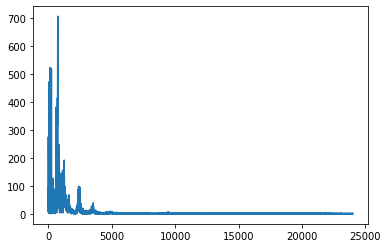

In [43]:
wave = thinkdsp.read_wave(path_A+'/'+A_records[-50])
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

#**Preprocesamiento de los datos**